In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tf

In [22]:
sequence = "D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/brightfield/*tif"
reference_sequence = "D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.tif"
reference_sequence_period = 3.577851226661945105e+01

seq = tf.imread(sequence).astype(np.int32)
ref_seq = tf.imread(reference_sequence).astype(np.int32)

In [3]:
ssds = []
for i in range(seq.shape[0]):
    ssd = []
    for j in range(ref_seq.shape[0]):
        ssd.append(np.sum((ref_seq[j] - seq[i])**2))
    ssds.append(ssd)

ssds = np.array(ssds)

In [18]:
sads = []
for i in range(seq.shape[0]):
    sad = []
    for j in range(ref_seq.shape[0]):
        diff = ref_seq[j] - seq[i]
        diff = diff[diff > 0]
        sad.append(np.sum(diff))
    sads.append(sad)

sads = np.array(sads)

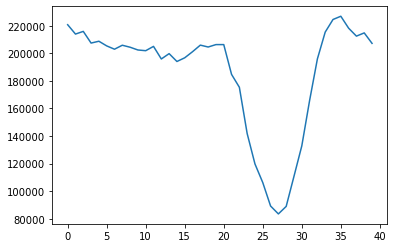

In [8]:
plt.plot(sads[0])
plt.show()

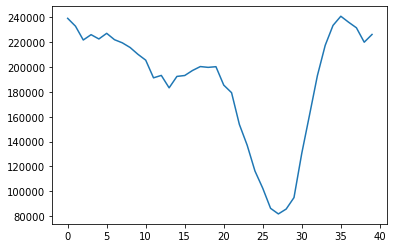

In [42]:
plt.plot(sads[0])
plt.show()

In [ ]:
def v_fitting_standard(y_1, y_2, y_3):
    # Fit using a symmetric 'V' function, to find the interpolated minimum for three datapoints y_1, y_2, y_3,
    # which are considered to be at coordinates x=-1, x=0 and x=+1
    if y_1 > y_3:
        x = 0.5 * (y_1 - y_3) / (y_1 - y_2)
        y = y_2 - x * (y_1 - y_2)
    else:
        x = 0.5 * (y_1 - y_3) / (y_3 - y_2)
        y = y_2 + x * (y_3 - y_2)

    return x, y

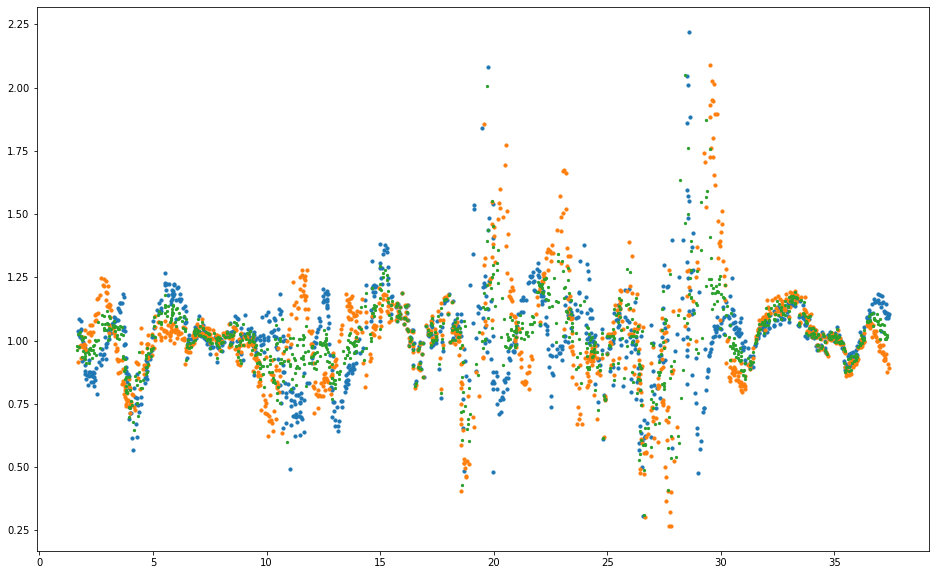

In [49]:
plt.figure(figsize = (16,10))

# lt
phases = []
sads = []
for i in range(seq.shape[0]):
    sad = []
    for j in range(ref_seq.shape[0]):
        diff = (ref_seq[j] - seq[i])
        diff = diff[diff < 0]
        sad.append(np.sum(diff))
    sads.append(sad)
sads = -np.array(sads)
for i in range(sads.shape[0]):
    minima = np.argmin(sads[i][2:-2]) + 2
    y_1 = sads[i][minima - 1]
    y_2 = sads[i][minima]
    y_3 = sads[i][minima + 1]

    subframe_minima = v_fitting_standard(y_1, y_2, y_3)[0]

    phases.append(minima + subframe_minima)
phases = np.array(phases)
delta_phases = []
for i in range(1, phases.shape[0]):
    delta_phase = phases[i] - phases[i - 1]
    while (delta_phase < -reference_sequence_period / 2):
        delta_phase += reference_sequence_period
    delta_phases.append(delta_phase)

plt.scatter(phases[1::], delta_phases, s = 10)

# gt
phases = []
sads = []
for i in range(seq.shape[0]):
    sad = []
    for j in range(ref_seq.shape[0]):
        diff = (ref_seq[j] - seq[i])
        diff = diff[diff > 0]
        sad.append(np.sum(diff))
    sads.append(sad)
sads = np.array(sads)
for i in range(sads.shape[0]):
    minima = np.argmin(sads[i][2:-2]) + 2
    y_1 = sads[i][minima - 1]
    y_2 = sads[i][minima]
    y_3 = sads[i][minima + 1]

    subframe_minima = v_fitting_standard(y_1, y_2, y_3)[0]

    phases.append(minima + subframe_minima)
phases = np.array(phases)
delta_phases = []
for i in range(1, phases.shape[0]):
    delta_phase = phases[i] - phases[i - 1]
    while (delta_phase < -reference_sequence_period / 2):
        delta_phase += reference_sequence_period
    delta_phases.append(delta_phase)

plt.scatter(phases[1::], delta_phases, s = 10)




# abs
phases = []
sads = []
for i in range(seq.shape[0]):
    sad = []
    for j in range(ref_seq.shape[0]):
        diff = np.abs(ref_seq[j] - seq[i])
        sad.append(np.sum(diff))
    sads.append(sad)
sads = np.array(sads)
for i in range(sads.shape[0]):
    minima = np.argmin(sads[i][2:-2]) + 2
    y_1 = sads[i][minima - 1]
    y_2 = sads[i][minima]
    y_3 = sads[i][minima + 1]

    subframe_minima = v_fitting_standard(y_1, y_2, y_3)[0]

    phases.append(minima + subframe_minima)
phases = np.array(phases)
delta_phases = []
for i in range(1, phases.shape[0]):
    delta_phase = phases[i] - phases[i - 1]
    while (delta_phase < -reference_sequence_period / 2):
        delta_phase += reference_sequence_period
    delta_phases.append(delta_phase)

plt.scatter(phases[1::], delta_phases, s = 5)

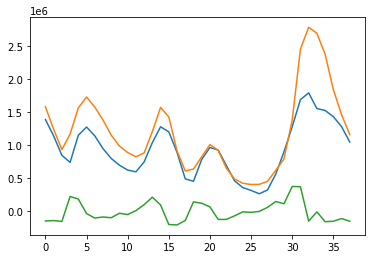

In [4]:
bc_I_1_squared = []
bc_I_2_squared = []
bc_I_1_times_I_2 = []

# Get our ssd bias correction
for i in range(1, ref_seq.shape[0] - 1):
    y_1 = ref_seq[i - 1]
    y_2 = ref_seq[i]
    y_3 = ref_seq[i + 1]

    I_0 = y_2
    I_2 = (y_1 + y_3 - 2 * y_2) / 2
    I_1 = y_3 - I_2 - I_0

    I_1_squared = np.sum(I_1**2)
    I_2_squared = np.sum(I_2**2)
    I_1_times_I_2 = np.sum(I_1 * I_2)

    bc_I_1_squared.append(I_1_squared)
    bc_I_2_squared.append(I_2_squared)
    bc_I_1_times_I_2.append(I_1_times_I_2)

bc_I_1_squared = np.array(bc_I_1_squared)
bc_I_2_squared = np.array(bc_I_2_squared)
bc_I_1_times_I_2 = np.array(bc_I_1_times_I_2)

plt.plot(bc_I_1_squared)
plt.plot(bc_I_2_squared)
plt.plot(bc_I_1_times_I_2)
    

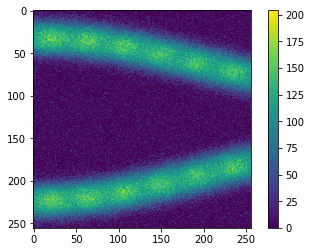

In [5]:
from classes.drawer import Drawer


class Peristalsis(Drawer):
    def __init__(self, beats, reference_period, dimensions):
        super().__init__(beats, reference_period, dimensions)
        self.xs = np.linspace(0, self.sequence.shape[1], 7)

    def draw_frame_at_phase(self, phase):
        self.clear_canvas()
        for i in range(self.xs.shape[0]):
            self.draw_circular_gaussian(self.xs[i], 32 + 64 *  np.sin(phase / 2 + self.xs[i] / 256)**2, 24, 16, 0, 1.4, 100)
            self.draw_circular_gaussian(self.xs[i], self.dimensions[1] - (32 + 64 *  np.sin(phase / 2 + self.xs[i] / 256)**2), 24, 16, 0, 1.4, 100)



v = Peristalsis(6, 38.1, (256, 256))
v.generate_reference_sequence()
v.generate_sequence()

tf.imwrite("test.tif", v.reference_sequence)

plt.imshow(v.sequence[0])
plt.colorbar()
plt.show()

In [6]:
from classes.basic_optical_gating import BasicOpticalGating as BOG, BasicOpticalGatingPlotter as BOGP, Logger

sog = BOG()
sog.logger.set_quiet()
sog.set_reference_period(v.reference_period)
sog.set_reference_sequence(v.reference_sequence)
sog.set_sequence(v.sequence)
sog.set_reference_framerates(v.reference_phases)
sog.run(bias_correct = False, drift_correct = False)

sog_bc = BOG()
sog_bc.logger.set_quiet()
sog_bc.set_reference_period(v.reference_period)
sog_bc.set_reference_sequence(v.reference_sequence)
sog_bc.set_sequence(v.sequence)
sog_bc.set_reference_framerates(v.reference_phases)
sog_bc.run(bias_correct = True, drift_correct = False)

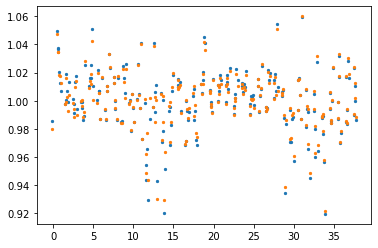

In [7]:
plt.scatter(sog.phases[1::], sog.delta_phases, s = 5)
plt.scatter(sog.phases[1::], sog_bc.delta_phases, s = 5)
plt.show()

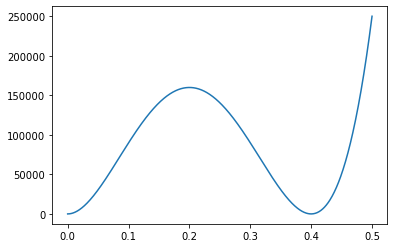

In [8]:
def fit_function(t, t_n, I_0p, I_1p):
    return (t - t_n)**2 * (I_0p**2 + I_1p**2 * t**2 + 2 * I_0p * I_1p * t)

xs = np.linspace(0, 0.5, 1000)

plt.plot(xs, fit_function(xs, 0.4, 1, -10000))
plt.show()

In [9]:
plt.plot(sads[100])
plt.show()

NameError: name 'sads' is not defined